# Daily IRI Parameters for given level of solar activity

PyIRI can calculate daily ionospheric parameters for the user provided grid.
The estimation of the parameters occurs simultaneously at all grid points
and for all desired diurnal time frames. The parameters are obtained by
linearly interpolating between min and max levels of solar activity, and
by interpolating between meadian montly values to the day of interest. 

1. Import libraries:

In [1]:
import numpy as np
import PyIRI
import PyIRI.main_library as ml
import PyIRI.plotting as plot

2. Specify a year, a month, and a day:

In [2]:
year = 2020
month = 4
day = 1

3. Specify solar flux index F10.7 in SFU:

In [3]:
f107 = 100

4. Specify what coefficients to use for the peak of F2 layer:

In [4]:
ccir_or_ursi = 0

5. Create any horizontal grid (regular or irregular, global or regional).
The grid arrays (alon and alat) should be flattened to be 1-D arrays. 
This is an example of a regular global grid:

In [5]:
lon_res = 5
lat_res = 5

alon_2d, alat_2d = np.mgrid[-180:180 + lon_res:lon_res, -90:90 + lat_res:lat_res]

alon = np.reshape(alon_2d, alon_2d.size)
alat = np.reshape(alat_2d, alat_2d.size)

6. Create any temporal array expressed in decimal hours (regular or irregular).
For this example we use regularly spaced time array:

In [6]:
hr_res = 10
ahr = np.arange(0, 24, hr_res)

12. Create height array. It can be regular or irregular.
Here is an example for regularly spaced array:

In [7]:
alt_res = 1
alt_min = 90
alt_max = 700
aalt = np.arange(alt_min, alt_max, alt_res)

7. Find ionospheric parameters for F2, F1, E, and Es regions by
calling IRI_density_1day function:

In [8]:
f2, f1, e_peak, es_peak, sun, mag, edp = ml.IRI_density_1day(year, month, day, ahr, alon, alat, aalt, f107, PyIRI.coeff_dir, ccir_or_ursi)

f2 dictionary contains:

-  peak density 'Nm' in m-3

-  critical frequency 'fo' in MHz

-  the obliquity factor for a distance of 3,000 km 'M3000'

-  height of the peak 'hm' in km

-  thickness of the topside 'B_top' in km

-  thickness of the bottomside 'B_bot' in km.


f1 dictionary contains:

-  peak density 'Nm' in m-3

-  critical frequency 'fo' in MHz

-  probability occurrence of F1 reion 'P'

-  height of the peak 'hm' in km

-  thickness of the bottomside 'B_bot' in km.


e_peak dictionary contains:

-  peak density 'Nm' in m-3

-  critical frequency 'fo' in MHz

-  height of the peak 'hm' in km

-  thickness of the bottomside 'B_bot' in km.

-  thickness of the topside 'B_top' in km.


e_peak dictionary contains:

-  peak density 'Nm' in m-3

-  critical frequency 'fo' in MHz

-  height of the peak 'hm' in km

-  thickness of the bottomside 'B_bot' in km.

-  thickness of the topside 'B_top' in km.


sun dictionary contains:

-  longitude of subsolar point 'lon'

-  latitude of subsolar point 'lat'


mag dictionary contains:

-  magnetic field inclination in degrees 'inc'

-  modified dip angle in degrees 'modip'

-  magnetic dip latitude in degrees 'mag_dip_lat'


EDP array:

-  3-D electron density with shape  [N_T, N_V, N_G]

8. Plot results for F2 region at time stamp UT=10:

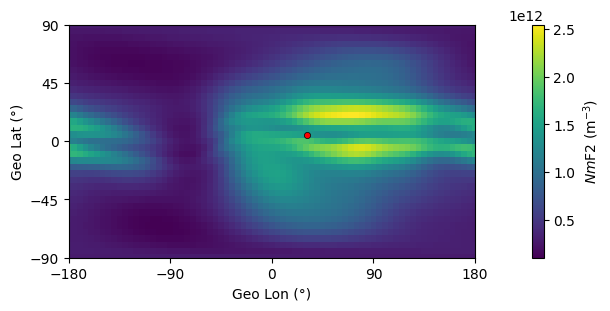

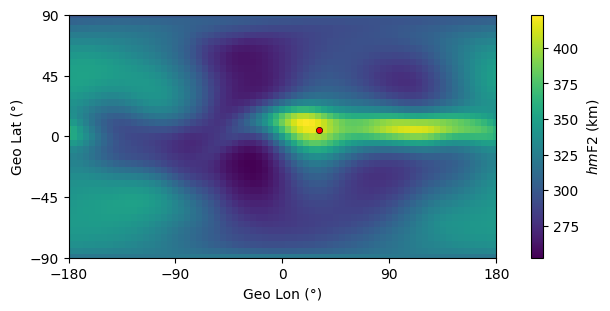

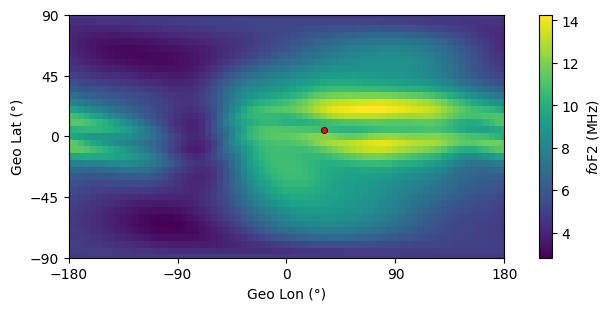

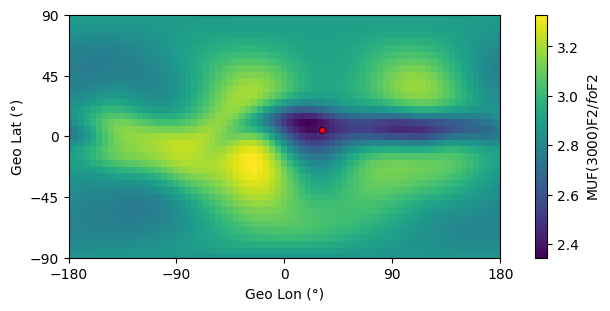

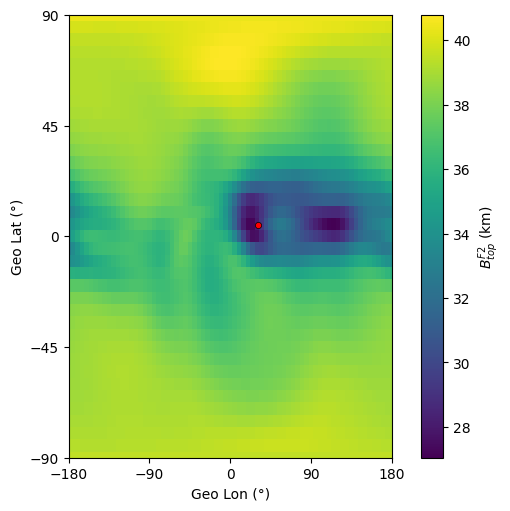

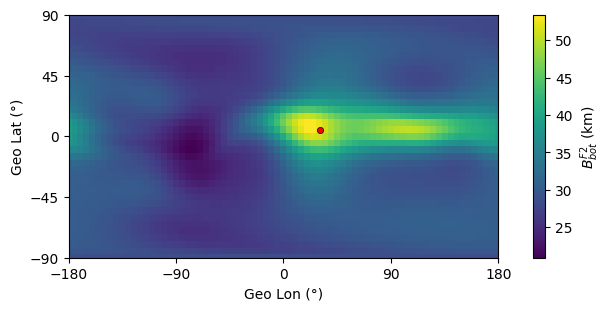

In [9]:
UT_plot = 10
plot_dir = '/Users/vmakarevich/Documents/Science_VF2/PyIRI_Test/'
plot.PyIRI_plot_NmF2(f2, ahr, alon, alat, alon_2d, alat_2d, sun,
                            UT_plot, plot_dir, plot_name='PyIRI_NmF2.png')

plot.PyIRI_plot_hmF2(f2, ahr, alon, alat, alon_2d, alat_2d, sun,
                            UT_plot, plot_dir, plot_name='PyIRI_hmF2.png')

plot.PyIRI_plot_foF2(f2, ahr, alon, alat, alon_2d, alat_2d, sun,
                            UT_plot, plot_dir, plot_name='PyIRI_foF2.png')

plot.PyIRI_plot_M3000(f2, ahr, alon, alat, alon_2d, alat_2d, sun,
                            UT_plot, plot_dir, plot_name='PyIRI_M3000.png')

plot.PyIRI_plot_B_F2_top(f2, ahr, alon, alat, alon_2d, alat_2d, sun,
                            UT_plot, plot_dir, plot_name='PyIRI_B_F2_top.png')

plot.PyIRI_plot_B_F2_bot(f2, ahr, alon, alat, alon_2d, alat_2d, sun,
                            UT_plot, plot_dir, plot_name='PyIRI_B_F2_bot.png')

9. Plot results for F1 region:

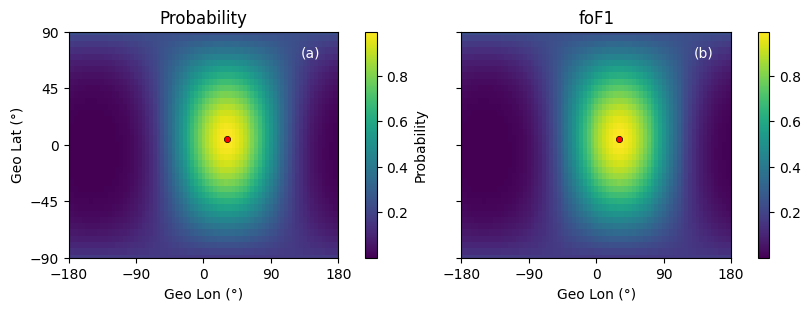

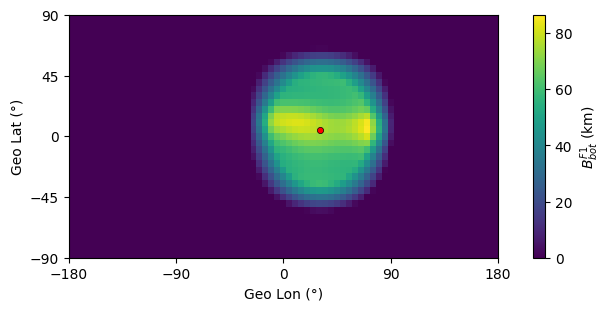

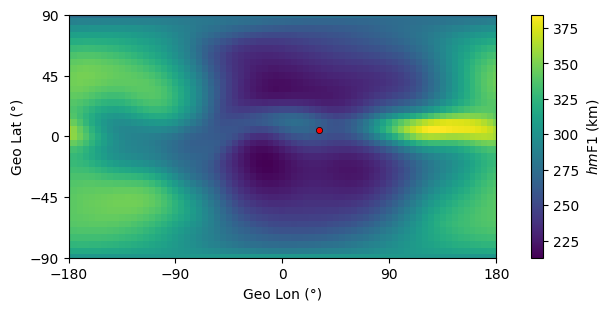

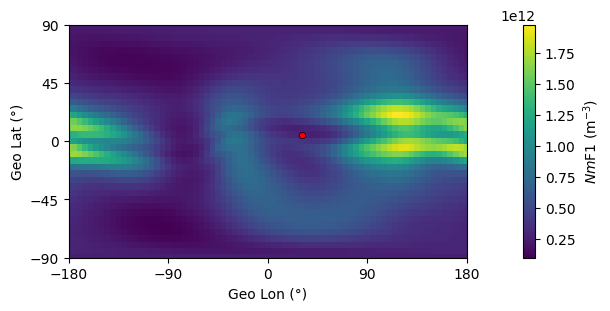

In [10]:
plot.PyIRI_plot_foF1(f1, ahr, alon, alat, alon_2d, alat_2d, sun,
                            UT_plot, plot_dir, plot_name='PyIRI_foF1.png')

plot.PyIRI_plot_B_F1_bot(f1, ahr, alon, alat, alon_2d, alat_2d, sun,
                            UT_plot, plot_dir, plot_name='PyIRI_B_F1_bot.png')

plot.PyIRI_plot_hmF1(f1, ahr, alon, alat, alon_2d, alat_2d, sun,
                            UT_plot, plot_dir, plot_name='PyIRI_hmF1.png')

plot.PyIRI_plot_NmF1(f1, ahr, alon, alat, alon_2d, alat_2d, sun,
                            UT_plot, plot_dir, plot_name='PyIRI_NmF1.png')

10. Plot results for E region:

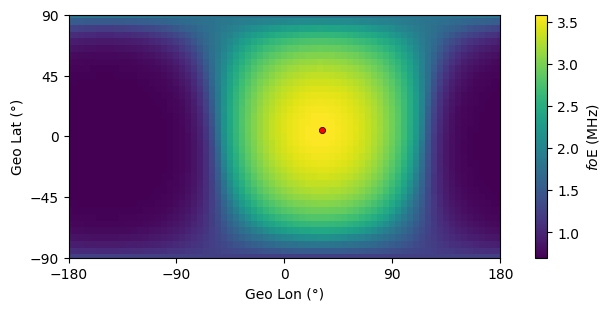

In [11]:
plot.PyIRI_plot_foE(e_peak, ahr, alon, alat, alon_2d, alat_2d, sun,
                            UT_plot, plot_dir, plot_name='PyIRI_foE.png')


11. Plot results for Es region:

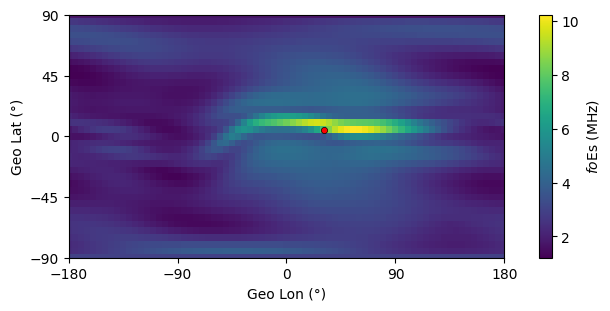

In [12]:
plot.PyIRI_plot_foEs(es_peak, ahr, alon, alat, alon_2d, alat_2d, sun,
                            UT_plot, plot_dir, plot_name='PyIRI_foEs.png')


14. Plot electron density veritical profiles from one location.
Make sure this location belongs to alon and alat arrays. 

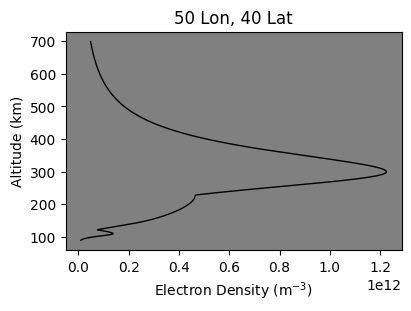

In [13]:
lon_plot = 50
lat_plot = 40
plot.PyIRI_EDP_sample_1day(edp, ahr, alon, alat, lon_plot, lat_plot, aalt,
                     UT_plot, plot_dir, plot_name='PyIRI_EDP_sample_1day.png')